<a href="https://colab.research.google.com/github/Felipe-Pinto/python_para_exatas/blob/main/CN_Projeto6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 6: Achando o melhor polinômio usando método dos quadrados mínimos

O método dos quadrados mínimos consiste em escolher os coeficientes $\alpha_1, \alpha_2, \cdots, \alpha_n$ de modo a encontrar uma função $\varphi(x)$ que minimize a seguinte função:

**Min** F($\alpha_1, \alpha_2, \cdots, \alpha_n$) = $\displaystyle \sum_{k=1}^{m} d_k^2 = \displaystyle \sum_{k=1}^{m} (f(x_k) - \varphi(x_k))^2$

onde:

$\varphi(x_k) = \alpha_1 g_1(x_k) + \alpha_2 g_2(x_k) + \cdots + \alpha_n g_n(x_k)$, $g_i(x_k), \forall i = 1,\cdots, n$ são funções $n$ contínuas em $[a,b]$, $d_k^2$ são os desvios quadráticos entre o valor tabelado $f(x_k)$ e o modelo proposto pela função $\varphi(x)$ no k-ésimo ponto tabelado $x_k$.

É importante frisar que os n pontos tabelados devem ser distintos e a representação geométrica para encontrar o modelo tal que minimiza os erros entre os valores tabelados. No caso apresentado na Figura 1, é suposto que o modelo é um polinômio de grau 1 (reta).

![](https://drive.google.com/uc?export=view&id=1M1iSigR_fpvq8YFBemgHH5J6Jyj_lCZ5)
Figura 1: Reta que minimiza o erro entre valores tabelados e o valor fornecido pelo modelo.

É importante ressaltar que neste caso: $\varphi(x) = a + bx$, tal que $g_1(x) = 1$, $g_2(x) = x$, $\alpha_1 = a$ e $\alpha_2 = b$.

A resolução deste problema consiste na obtenção e resolução de um sistema de equações associado, denominado **sistema normal A x = b**.

Para o caso de se querer realizar a ajuste com um modelo quadrático, deverão ser empregadas as seguintes funções: **$g_1(x) = 1$**, **$g_2(x) = x$** e **$g_3(x) = x^2$**.

O sistema poderá ser escrito com:

![](https://drive.google.com/uc?export=view&id=1MNwv5si9JDb8oKGMpUSqdo5EptoWLzA8)

Esse sistema pode ser reagrupado para deixar em evidência os componentes da matriz **A** e do vetor **b** do **sistema normal** associado.


![](https://drive.google.com/uc?export=view&id=1dYUvNKPseOUSvxRikyQPL6YWrNpgwHBs)

O código dado a seguir fornece a melhor curva para qualquer polinômio de grau **dim-1**. Por exemplo, se **dim = 3**, então, serão usadas as funções $g_1(x) = 1$, $g_2(x) = x$ e $g_3(x) = x^2$. O código irá determinar quais são os valores $\alpha_1$, $\alpha_2$ e $\alpha_3$ associados que minimizam a soma do erro quadrático entre o valor tabelado $f(x)$ e $\varphi$ nos m pontos tabelados dados.

In [ ]:
import numpy as np

def sistemaAumentado(x,y,dim):
  n = len(x)
  A = np.empty((dim,dim))
  b = np.empty((dim))
  soma = []
  for i in range(0,2*dim+1):
    aux = 0
    for k in range(0,n):
      aux = aux + x[k]**i
    soma.append(aux)

  for i in range(0,dim):
    for j in range(i,dim):
      A[i,j] = soma[i+j]
      if (i != j):
        A[j,i] = A[i,j]


  b = []
  for i in range(0,dim):
    aux = 0
    for k in range(0,n):
      aux = aux + y[k]*(x[k]**(i))
    b.append(aux)

  return A, b

x = [-1.0, -0.75, -0.6,	-0.5,	-0.3, 0, 0.2, 0.4, 0.5,	0.7, 1]
y = [2.05, 1.153, 0.45,	0.4,	0.5, 0,	0.2, 0.6, 0.512, 1.2, 2.05]
A, b = sistemaAumentado(x,y,10)
print("A = ",A)
print("b = ",b)
coef = np.linalg.solve(A,b)
print("coef = ",coef)

A =  [[ 1.10000000e+01 -3.50000000e-01  4.20250000e+00 -2.49875000e-01
   2.84640625e+00 -1.38864687e-01  2.37842252e+00 -7.76906867e-02
   2.18309312e+00 -4.45658023e-02]
 [-3.50000000e-01  4.20250000e+00 -2.49875000e-01  2.84640625e+00
  -1.38864687e-01  2.37842252e+00 -7.76906867e-02  2.18309312e+00
  -4.45658023e-02  2.09267165e+00]
 [ 4.20250000e+00 -2.49875000e-01  2.84640625e+00 -1.38864687e-01
   2.37842252e+00 -7.76906867e-02  2.18309312e+00 -4.45658023e-02
   2.09267165e+00 -2.60496471e-02]
 [-2.49875000e-01  2.84640625e+00 -1.38864687e-01  2.37842252e+00
  -7.76906867e-02  2.18309312e+00 -4.45658023e-02  2.09267165e+00
  -2.60496471e-02  2.04820002e+00]
 [ 2.84640625e+00 -1.38864687e-01  2.37842252e+00 -7.76906867e-02
   2.18309312e+00 -4.45658023e-02  2.09267165e+00 -2.60496471e-02
   2.04820002e+00 -1.53678801e-02]
 [-1.38864687e-01  2.37842252e+00 -7.76906867e-02  2.18309312e+00
  -4.45658023e-02  2.09267165e+00 -2.60496471e-02  2.04820002e+00
  -1.53678801e-02  2.0255086

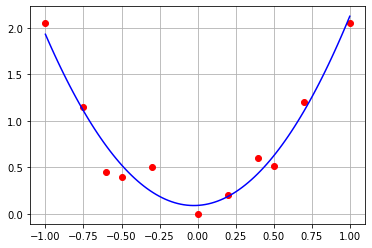

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(x, y,'ro')
data = np.linspace(min(x), max(x), 100)
# p = coe[0]*x^2 + coef[1]*x + coef[0]
c = coef[::-1].copy()
p = np.poly1d(c)
plt.plot(data, p(data),'b-')
plt.grid()
plt.show()


O projeto consiste em se realizar o ajuste de curvas para todos os polinômios de grau 1 até 10 e verificar qual deles possui o menor erro de ajuste para os dados fornecidos.

Para obter os dados é necessário rodar o código dado a seguir.

Digite o número da matrícula: 950219
 Valores tabelados 
 x =  [-0.9534968312177337, -0.8754124245812684, -0.8658189566072368, -0.8347397398769127, -0.7423708558134187, -0.6982032688713943, -0.6252903542734847, -0.6163691910404758, -0.6023740077967298, -0.47070594830264867, -0.4161238820880398, -0.3889393491676608, -0.35915308208847246, -0.2267231115742238, -0.09732694983155857, -0.04546658326744325, 0.06047744449105728, 0.1387261591192251, 0.20021816304062473, 0.2656368512328874, 0.3777801721361632, 0.44271984746932425, 0.47139110268834805, 0.5780495421662782, 0.6313344336737318, 0.7177782661017162, 0.7959488182092872, 0.8105353430537655, 0.919132775290399, 1.0539685560340124]
 y =  [0.04214269442585524, 0.04960644029213395, 0.05065583696612729, 0.054289521403295175, 0.06766878640554756, 0.07583113703562835, 0.09281000278533084, 0.09525828553475123, 0.0992914450113147, 0.15292619118914982, 0.1876532729262217, 0.20912428349138593, 0.23669908492345185, 0.43762062926948375, 0.80852941673

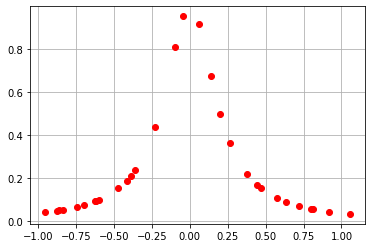

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt


def runge(x):
  return 1 / (1 + 25 * x ** 2)


# Obtendo valores para gerar as opções de parâmetros para o problema a ser explicado em vídeo.
texto    = input('Digite o número da matrícula: ')
num      = int(texto)
random.seed(num)
x = []
y = []
aux = -1
for i in range(0,30):
  aux = aux + random.random()/7
  x.append(aux)
  y.append(runge(aux))

print(" Valores tabelados ")
print(" x = ",x)
print(" y = ",y)


plt.plot(x, y,'ro')
plt.grid()
plt.show()